# Transactions Fraud Detection

**Authors:** [Peter Macinec](https://github.com/pmacinec), [Timotej Zatko](https://github.com/timzatko)

## Nature Inspired Algorithms - Firefly Algorithm, Cuckoo Search Algorithm, Bat Algorithm, Flower Pollination Algorithm for Feature Selection

We will train the model with selected features on the whole dataset. With the following algorithm from Xin-She Yang.

- Firefly Algorithm
- Cuckoo Search Algorithm
- Bat Algorithm
- Flower Pollination Algorithm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

from NiaPy.task import StoppingTask, OptimizationType
from NiaPy.algorithms.basic import FireflyAlgorithm, CuckooSearch, \
    BatAlgorithm, FlowerPollinationAlgorithm

from src.dataset import load_processed_data
from src.data_balancing import random_undersample
from src.evaluation import custom_classification_report

from src.classification_benchmark import ClassificationBenchmark

### Load the data

In [3]:
x_train, y_train, x_test, y_test = load_processed_data()

Number of records:
  x_train - 472432
  y_train - 472432
  x_test - 118108
  y_test - 118108


In [4]:
x_train, y_train = random_undersample(x_train, y_train)
len(x_train), len(y_train)

(32842, 32842)

### Setup classification benchmark

In [5]:
def model_fn():
    return DecisionTreeClassifier(random_state=42)

In [6]:
columns_count = len(x_train.columns)

_x_train, _x_val, _y_train, _y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

benchmark = ClassificationBenchmark(
    model_fn,
    roc_auc_score,
    _x_train,
    _y_train,
    _x_val,
    _y_val
)

In [7]:
def optimize(benchmark, algorithm, nGEN, num_runs = 5):
    """
    Optimize task with provided algorithm.
    
    :param benchmark: NiaPy.Benchmark to optimize.
    :param algorithm: algorithm object to use for optimization task.
    :param nGEN: number of generations.
    :param num_runs: number of algorithm runs (defaults to 5).
    """
    best_columns = None
    best_score = 0
    
    for i in range(num_runs):
        # when using OptimizationType.MAXIMIZATION, the library will fail
        # we use OptimizationType.MINIMIZATION instead and invert the score
        task = StoppingTask(
            D=benchmark.get_length(),
            nGEN=nGEN,
            optType=OptimizationType.MINIMIZATION,
            benchmark=benchmark
        )
        
        solution_vec, score = algorithm.run(task=task)    
        
        # invert the score
        score = 1 - score
        columns = benchmark.select_columns(solution_vec)
        
        print('--------------')
        print(f'Run {i + 1}')
        print('--------------')
        print(f'Score: {score}')
        print(f'Number of features selected: {len(columns)}\n')
        print('\n')
        
        if score > best_score:
            best_score = score
            best_columns = columns

    print(f'\nBest score of {num_runs} runs: {best_score}')
    print(f'Number of features selected: {len(best_columns)}')
            
    return best_columns

### Firefly Algorithm (FA)

In [8]:
%%time

columns = optimize(benchmark, FireflyAlgorithm(), 100)

--------------
Run 1
--------------
Score: 0.80258573298138
Number of features selected: 129



--------------
Run 2
--------------
Score: 0.7992984117586835
Number of features selected: 123



--------------
Run 3
--------------
Score: 0.8028966782550118
Number of features selected: 124



--------------
Run 4
--------------
Score: 0.8025539707516696
Number of features selected: 132



--------------
Run 5
--------------
Score: 0.8021858534645591
Number of features selected: 128




Best score of 5 runs: 0.8028966782550118
Number of features selected: 124
CPU times: user 1h 53min 40s, sys: 664 ms, total: 1h 53min 40s
Wall time: 1h 53min 41s


not fraud
precision: 0.7940473890362356
recall: 0.9897538067454106
f1-score: 0.8811648157803691
support: 91351


is fraud
precision: 0.7793493635077794
recall: 0.12355645251709833
f1-score: 0.21329720313558503
support: 26757


accuracy: 0.7935194906356894


macro avg
precision: 0.7866983762720074
recall: 0.5566551296312544
f1-score: 0.5472310094579771
support: 118108


weighted avg
precision: 0.7907175970740915
recall: 0.7935194906356894
f1-score: 0.7298614856796437
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7866983762720074




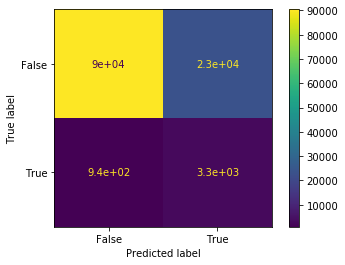

In [9]:
clf = model_fn()
clf = clf.fit(x_train[columns], y_train)
custom_classification_report(clf, x_test[columns], y_test)

### Cuckoo Search Algorithm (CS)

In [10]:
%%time

columns = optimize(benchmark, CuckooSearch(), 100)

--------------
Run 1
--------------
Score: 0.7940828681673648
Number of features selected: 223



--------------
Run 2
--------------
Score: 0.7996444577737617
Number of features selected: 119



--------------
Run 3
--------------
Score: 0.7944536748111514
Number of features selected: 104



--------------
Run 4
--------------
Score: 0.7973471443854394
Number of features selected: 125



--------------
Run 5
--------------
Score: 0.7967984692552745
Number of features selected: 132




Best score of 5 runs: 0.7996444577737617
Number of features selected: 119
CPU times: user 4h 5min 19s, sys: 1.28 s, total: 4h 5min 21s
Wall time: 4h 5min 21s


not fraud
precision: 0.8023817469657316
recall: 0.9898591549295774
f1-score: 0.8863149112850809
support: 92300


is fraud
precision: 0.7793493635077794
recall: 0.12809981401115933
f1-score: 0.2200332778702163
support: 25808


accuracy: 0.8015545094320452


macro avg
precision: 0.7908655552367555
recall: 0.5589794844703684
f1-score: 0.5531740945776485
support: 118108


weighted avg
precision: 0.7973488977744589
recall: 0.8015545094320452
f1-score: 0.7407244652935238
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7908655552367554




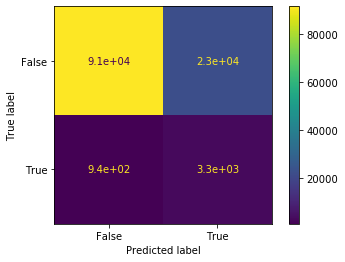

In [11]:
clf = model_fn()
clf = clf.fit(x_train[columns], y_train)
custom_classification_report(clf, x_test[columns], y_test)

### Flower Pollination Algorithm (FPA)

In [8]:
%%time

columns = optimize(benchmark, FlowerPollinationAlgorithm(), 100)

--------------
Run 1
--------------
Score: 0.8010721352230793
Number of features selected: 124



--------------
Run 2
--------------
Score: 0.7977500378364661
Number of features selected: 135



--------------
Run 3
--------------
Score: 0.7977533763482023
Number of features selected: 116



--------------
Run 4
--------------
Score: 0.7979884168480591
Number of features selected: 125



--------------
Run 5
--------------
Score: 0.7999647694275417
Number of features selected: 130




Best score of 5 runs: 0.8010721352230793
Number of features selected: 124
CPU times: user 2h 29min 50s, sys: 1 s, total: 2h 29min 51s
Wall time: 2h 29min 51s


not fraud
precision: 0.7986844185270405
recall: 0.990373201781611
f1-score: 0.8842595518564073
support: 91827


is fraud
precision: 0.7916077322017916
recall: 0.12777291579468056
f1-score: 0.22003079644857976
support: 26281


accuracy: 0.7984302502794053


macro avg
precision: 0.7951460753644161
recall: 0.5590730587881458
f1-score: 0.5521451741524935
support: 118108


weighted avg
precision: 0.7971097377830276
recall: 0.7984302502794053
f1-score: 0.7364575746755803
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7951460753644161




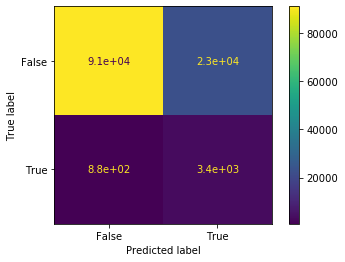

In [9]:
clf = model_fn()
clf = clf.fit(x_train[columns], y_train)
custom_classification_report(clf, x_test[columns], y_test)

### Bat Algorithm (BA)

In [10]:
%%time

columns = optimize(benchmark, BatAlgorithm(), 100)

--------------
Run 1
--------------
Score: 0.8014148427264216
Number of features selected: 127



--------------
Run 2
--------------
Score: 0.801611443973096
Number of features selected: 118



--------------
Run 3
--------------
Score: 0.7943139210004257
Number of features selected: 124



--------------
Run 4
--------------
Score: 0.8018177361774484
Number of features selected: 126



--------------
Run 5
--------------
Score: 0.7984070291251765
Number of features selected: 136




Best score of 5 runs: 0.8018177361774484
Number of features selected: 126
CPU times: user 4h 4min 30s, sys: 1.05 s, total: 4h 4min 31s
Wall time: 4h 4min 31s


not fraud
precision: 0.801038062283737
recall: 0.9904334795639144
f1-score: 0.8857242738810825
support: 92092


is fraud
precision: 0.7923149457802923
recall: 0.12918972939729398
f1-score: 0.2221561240002644
support: 26016


accuracy: 0.8007247603887967


macro avg
precision: 0.7966765040320146
recall: 0.5598116044806042
f1-score: 0.5539401989406735
support: 118108


weighted avg
precision: 0.799116595499492
recall: 0.8007247603887967
f1-score: 0.7395581463766006
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7966765040320145




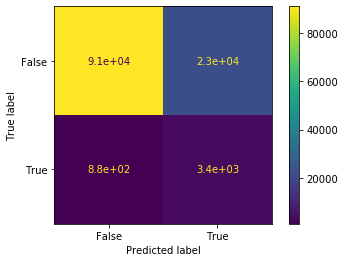

In [11]:
clf = model_fn()
clf = clf.fit(x_train[columns], y_train)
custom_classification_report(clf, x_test[columns], y_test)

### Conclusion

__Firefly Algorithm__

Score (ROC AUC): 0.787
    
__Cuckoo Search Algorithm__

Score (ROC AUC): 0.790
    
__Flower Pollination Algorithm__

Score (ROC AUC): 0.795
    
__Bat Algorithm__

Score (ROC AUC): 0.797